In [1]:
#Importing TensorFlow

import tensorflow as tf

In [2]:
#Importing mnist data from tensorflow tutorial examples.

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
#Checking type of mnist

type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
#Checking shape of the train imgaes.

mnist.train.images.shape

(55000, 784)

In [6]:
#Extracting a sample image for testing/visualizing.

sample = mnist.train.images[2].reshape(28,28)

In [7]:
#Importing matplotlib to imageshow (imshow)

import matplotlib.pyplot as plt

#inline function so matplotlib can output graphs within the notebook

%matplotlib inline

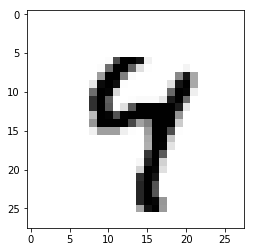

In [9]:
#using matplotlib to show sample image.

plt.imshow(sample, cmap = 'Greys')

In [10]:
we will use this output to define n_samples and n_inputs

mnist.train.images.shape # 

(55000, 784)

In [34]:
#some of the attributes we need to set for our NN
learning_rate = 0.001
training_epochs = 50
batch_size = 100
n_classes = 10

# number of total columns/attributes were 786 see 

n_input = 784 

#number of total data samples , 55000

n_samples = mnist.train.num_examples 

#Hidden layer1 and 2 for NN

n_hidden_1 = 256
n_hidden_2 = 256

In [15]:
def multilayer_perceptron (x,weights,biases):
    
    # x: placeholder for Data input
    # weights: Dict of weights
    # biases: dict of bias values
    
    # First Hidden layer with RELU Activation
    # layer_1 = (x*weights) + bias
    
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    
    # Func(X * W + B) = RELU -> F(x) = max(0,x)
    
    layer_1 = tf.nn.relu(layer_1)
    
    #Second Hidden layer
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'] )
    layer_2 = tf.nn.relu(layer_2)
    
    #Last output Layer
    
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [16]:
#Setting up weights for NN

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [17]:
#Setting up biases for NN

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [18]:
#Setting up X for n_input (784)

x = tf.placeholder('float', [None, n_input])

In [19]:
#Setting up y for n_classes (10)

y = tf.placeholder('float', [None, n_classes])

In [20]:
#using previously created function to calculate pred. this will be used in cost function.

pred = multilayer_perceptron(x,weights, biases)

In [21]:
#Calculating cost function.

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

#Using adamOptimizer for optimizer population.

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [22]:
##Training Model.

In [23]:
sess = tf.InteractiveSession()

In [24]:
#initializing all previously defined variables into tensorflow session.

init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [25]:
#running the initialization.

sess.run(init)

In [26]:
# 50 loops/epochs

for epoch in range (training_epochs):
    # Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
        
    print('Epoch:{} cost{:.4f}'.format(epoch+1, avg_cost))

print   ('Model has completed {} Epochs of training'. format(training_epochs))


Epoch:1 cost144.5463
Epoch:2 cost40.4585
Epoch:3 cost25.5263
Epoch:4 cost17.6586
Epoch:5 cost12.8816
Epoch:6 cost9.4969
Epoch:7 cost7.2101
Epoch:8 cost5.4171
Epoch:9 cost4.0789
Epoch:10 cost3.1760
Epoch:11 cost2.4017
Epoch:12 cost1.7805
Epoch:13 cost1.3736
Epoch:14 cost1.0449
Epoch:15 cost0.9293
Epoch:16 cost0.6926
Epoch:17 cost0.6205
Epoch:18 cost0.5370
Epoch:19 cost0.5066
Epoch:20 cost0.4417
Epoch:21 cost0.3544
Epoch:22 cost0.3371
Epoch:23 cost0.3884
Epoch:24 cost0.4066
Epoch:25 cost0.3340
Epoch:26 cost0.3154
Epoch:27 cost0.2592
Epoch:28 cost0.2714
Epoch:29 cost0.4250
Epoch:30 cost0.1837
Epoch:31 cost0.2478
Epoch:32 cost0.2568
Epoch:33 cost0.2617
Epoch:34 cost0.2334
Epoch:35 cost0.1710
Epoch:36 cost0.2370
Epoch:37 cost0.2273
Epoch:38 cost0.1680
Epoch:39 cost0.1869
Epoch:40 cost0.2077
Epoch:41 cost0.3024
Epoch:42 cost0.1625
Epoch:43 cost0.1577
Epoch:44 cost0.1834
Epoch:45 cost0.2091
Epoch:46 cost0.1279
Epoch:47 cost0.1850
Epoch:48 cost0.2277
Epoch:49 cost0.1299
Epoch:50 cost0.1270
Mod

In [27]:
# Model Evaluations

In [28]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [29]:
print(correct_predictions)

Tensor("Equal:0", shape=(?,), dtype=bool)


In [30]:
correct_predictions = tf.cast(correct_predictions, tf.float32)

In [31]:
print(correct_predictions)

Tensor("Cast:0", shape=(?,), dtype=float32)


In [32]:
accuracy = tf.reduce_mean(input_tensor=correct_predictions)

In [33]:
accuracy.eval({x:mnist.test.images, y: mnist.test.labels})

0.9603